<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** José Fernando Flores.

**Fecha:** 24 de marzo del 2020.

**Expediente** : 714575.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 8: Clase 13


## Tarea 7
> Usando notebook de jupyter resolver ejercicios de Reducción de Varianza.

### Ejercicio 1: 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
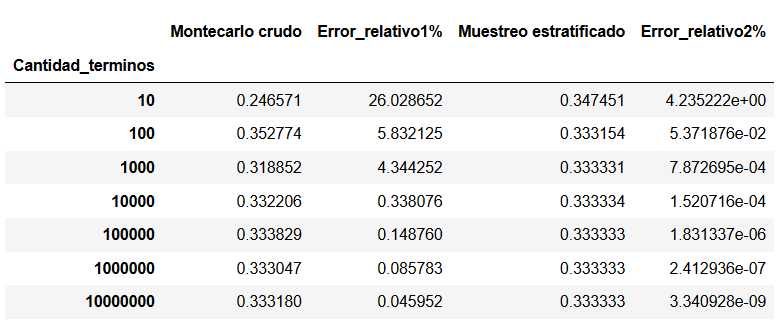

In [45]:
#Código de solución
#Importar paquetes
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

In [46]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [47]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int)

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo_Crudo', 'Error_relativo1%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo_Crudo"] = I_m
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo_Crudo"]-I)*100/I

# Ahora estratificamos 
def mont_estra(B):
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return v

ui2=list(map(lambda x:mont_estra(x),N))
z = [i**2 for i in ui2]
mc_estra=[z[i].mean() for i in range(len(z))]

#Añadimos a la tabla
df.loc[N,"Montecarlo_Estratificado"] = mc_estra
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Montecarlo_Estratificado"]-I)*100/I

df

,Montecarlo_Crudo,Error_relativo1%,Montecarlo_Estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.317224,4.832949,0.343375,3.012399e+00
100,0.313329,6.001290,0.333486,4.581230e-02
1000,0.317744,4.676942,0.333331,6.333221e-04
10000,0.332669,0.199186,0.333333,3.292395e-05
100000,0.333396,0.018869,0.333333,3.040121e-06
1000000,0.333626,0.087780,0.333333,1.841359e-08
10000000,0.333336,0.000704,0.333333,1.727202e-09
